Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We will combine 1D spectra of X01 G141 from 201911 and 202001.

# Previously
20200903/01 produced 1D spectra of X01 G141 from 201911 and 202001. Hafldy = 4 was recommended to be optimized.

# Resources:
- /Users/kbhirombhakdi/_work/Sidekicks/20200903/X01_201911_G141/flam_halfdy4.csv
- /Users/kbhirombhakdi/_work/Sidekicks/20200903/X01_202001_G141/flam_halfdy4.csv
- /Users/kbhirombhakdi/_work/Sidekicks/03_X01_spectrum/20200826/03_X01_combine_201911_202001.ipynb as template


In [1]:
from hstgrism.container import Container
from hstphot.mag2flux import mag2flux
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
identifier = 'X01_together_G141'
cobj = Container(identifier,identifier,'pdf',False) # to make folder


In [2]:
file_dict = {'201911':'./X01_201911_G141/flam_halfdy4.csv',
             '202001':'./X01_202001_G141/flam_halfdy4.csv',
            }
for ii,i in enumerate(file_dict):
    if ii==0:
        t = pd.read_csv(file_dict[i])
        t['dateobs'] = np.full_like(t.ww.values,i,dtype=object)
        
    else:
        tt = pd.read_csv(file_dict[i])
        tt['dateobs'] = np.full_like(tt.ww.values,i,dtype=object)
        t = t.append(tt)
t.sort_values(by=['ww'],inplace=True)
flam = copy.deepcopy(t)


Save ./X01_together_G141/X01_together_G141.csv


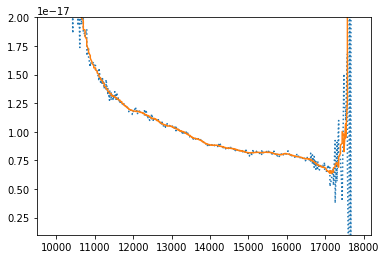

In [4]:
window_length = 11
polyorder = 0
##### try #####
ty = savgol_filter(flam.flam.values,window_length=window_length,polyorder=polyorder)
plt.figure()
plt.plot(flam.ww,flam.flam,':')
plt.plot(flam.ww,ty,'-')
plt.ylim(1e-18,2e-17)
##### save #####
flam['flam_smooth'] = ty.copy()
string = './{0}/{0}.csv'.format(identifier)
flam.to_csv(string)
print('Save {0}'.format(string))


In [28]:
flam = pd.read_csv('./{0}/{0}.csv'.format(identifier))
wavebound = {'G141':(11500.,17000.),
             'G102':(7500.,11500.)
            }


In [29]:
mag = pd.read_csv('/Users/kbhirombhakdi/_work/Sidekicks/03_X01_spectrum/20200821/X01_mag.csv')
mag_id = mag.identifier.values
mag_ww = mag.wavelength.values
mag_abmag = mag.ABmag.values
mag_emag = mag.emag.values

flam_g102 = pd.read_csv('/Users/kbhirombhakdi/_work/Sidekicks/03_X01_spectrum/20200826/X01_together_G102/X01_together_G102.csv')


Save ./X01_together_G141/X01_together_G141.pdf


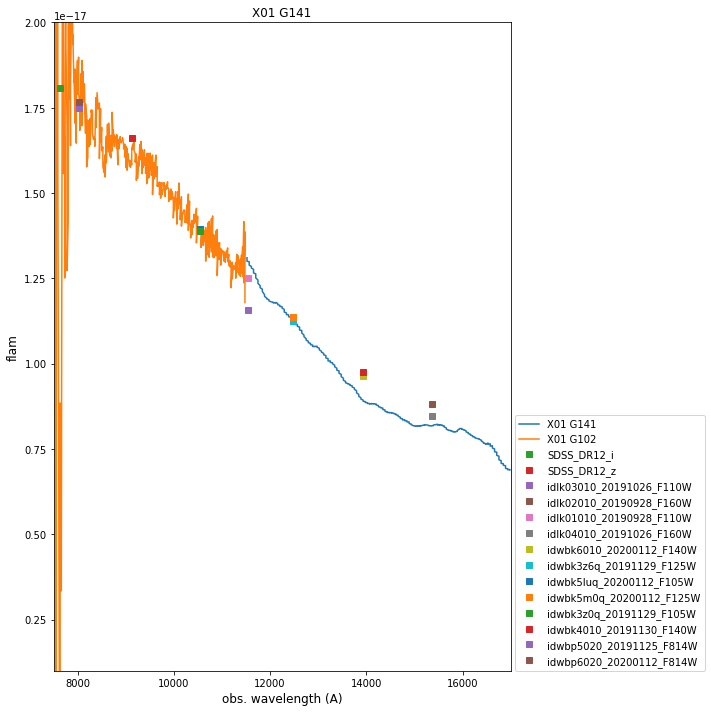

In [30]:
plt.figure(figsize=(10,10))
tx,ty = flam.ww.values,flam.flam_smooth.values
m = np.argwhere((tx >= wavebound['G141'][0])&(tx <= wavebound['G141'][1])).flatten()
plt.plot(tx[m],ty[m],label='X01 G141')
##### g102 #####
tx = flam_g102.ww.values
ty = flam_g102.flam.values
m = np.argwhere((tx >= wavebound['G102'][0])&(tx <= wavebound['G102'][1])).flatten()
plt.plot(tx[m],ty[m],label='X01 G102')
##### photometry #####
for ii,i in enumerate(mag_id):
    ty = mag2flux(mag_abmag[ii],mag_emag[ii],mag_ww[ii])
    if (mag_ww[ii] >= wavebound['G102'][0]) and (mag_ww[ii] <= wavebound['G141'][1]):
        plt.plot(mag_ww[ii],ty[0],'s',label=mag_id[ii])
##########
plt.legend(fontsize=10,loc=(1.01,0.))
plt.xlim(wavebound['G102'][0],wavebound['G141'][1])
plt.ylim(1e-18,2e-17)
plt.xlabel('obs. wavelength (A)',fontsize=12)
plt.ylabel('flam',fontsize=12)
plt.title('X01 G141',fontsize=12)
plt.tight_layout()
string = './{0}/{0}.pdf'.format(identifier)
plt.savefig(string,plotformat='pdf',bbox_inches='tight')
print('Save {0}'.format(string))


# Combine G102 and G141

Save ./X01_G102_G141_flam.csv


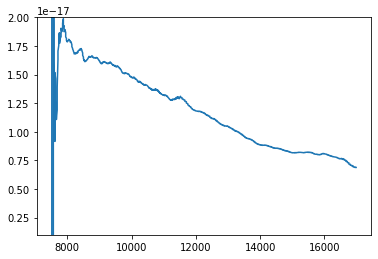

In [32]:
tx_g141,ty_g141 = flam.ww.values,flam.flam_smooth.values
m_g141 = np.argwhere((tx_g141 >= wavebound['G141'][0])&(tx_g141 <= wavebound['G141'][1])).flatten()
tx_g102,ty_g102 = flam_g102.ww.values,flam_g102.flam.values
ty_g102 = savgol_filter(ty_g102,window_length=11,polyorder=1)
m_g102 = np.argwhere((tx_g102 >= wavebound['G102'][0])&(tx_g102 <= wavebound['G102'][1])).flatten()
tx = np.concatenate([tx_g102[m_g102],tx_g141[m_g141]])
ty = np.concatenate([ty_g102[m_g102],ty_g141[m_g141]])
plt.plot(tx,ty)
plt.ylim(1e-18,2e-17)
t = {'ww':tx,'flam_smooth':ty}
string = './X01_G102_G141_flam.csv'
pd.DataFrame(t).to_csv(string)
print('Save {0}'.format(string))
